In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Data Preprocessing
# Merge datasets on customer ID (assuming 'CustomerID' is the common column)
data = pd.merge(customers, transactions, on="CustomerID")


In [4]:
# Handle Missing Values (Fill with mean or drop rows with NaN values)
data.fillna(data.mean(), inplace=True)

C:\Users\sinch\AppData\Local\Temp\ipykernel_39864\3347330586.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [5]:
# Identify and Drop Non-Numeric Columns
non_numeric_columns = ["CustomerID", "Name"]  # Add any other non-relevant text columns
numeric_data = data.drop(columns=non_numeric_columns, errors="ignore")


In [6]:
# Convert Categorical Columns to Numeric (if any)
categorical_columns = numeric_data.select_dtypes(include=["object"]).columns
numeric_data = pd.get_dummies(numeric_data, columns=categorical_columns, drop_first=True)


In [7]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [12]:
# Optimize Number of Clusters using Silhouette and DB Index
cluster_range = range(2, 11)
silhouette_scores = []
dbi_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, labels))
    dbi_scores.append(davies_bouldin_score(scaled_data, labels)) 


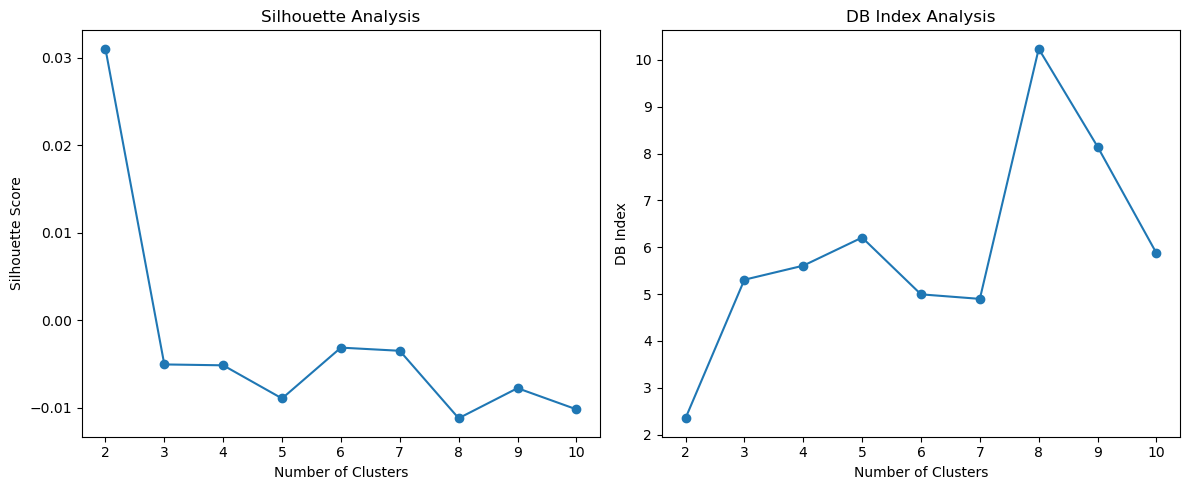

In [13]:
# Plot Silhouette and DB Index
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, dbi_scores, marker='o', label='DB Index')
plt.title('DB Index Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()

In [14]:
# Select Optimal Clusters (e.g., based on DB Index or Silhouette)
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [15]:
# Add Cluster Labels to Data
data["Cluster"] = clusters


In [16]:
# Evaluate Final Metrics
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index (K-Means, {optimal_clusters} clusters): {db_index}")

Davies-Bouldin Index (K-Means, 4 clusters): 5.606518467696473


In [17]:
# Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score (K-Means, {optimal_clusters} clusters): {sil_score}")

Silhouette Score (K-Means, 4 clusters): -0.00516449169188199


In [18]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data["PCA1"] = pca_data[:, 0]
data["PCA2"] = pca_data[:, 1]


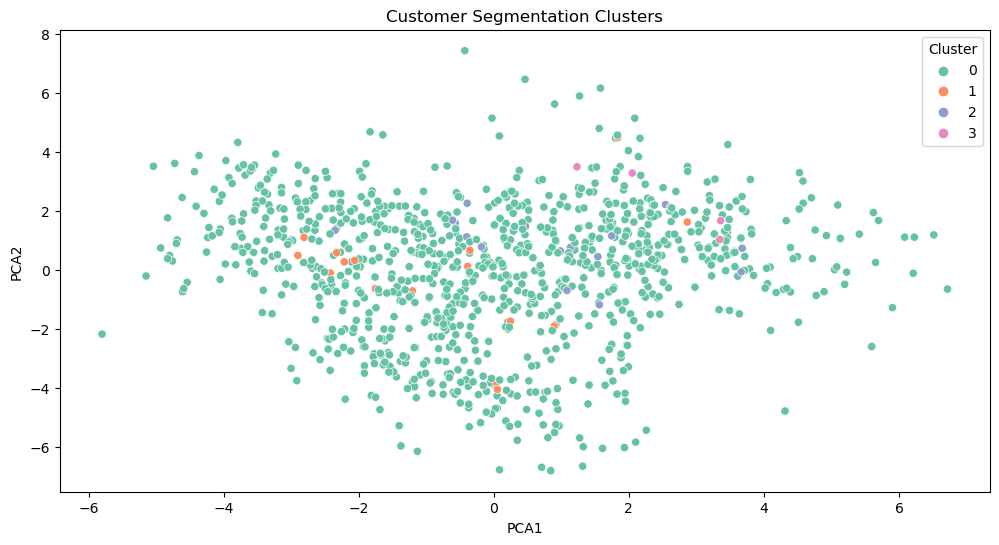

In [21]:
# Plot Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="Set2")
plt.title("Customer Segmentation Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

In [22]:
# Experiment with DBSCAN (Optional for Non-Spherical Clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [23]:
# Evaluate DBSCAN Metrics (if applicable)
if len(set(dbscan_labels)) > 1:  # Ensure more than one cluster is formed
    dbi_dbscan = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")
else:
    print("DBSCAN did not form distinct clusters")


DBSCAN did not form distinct clusters


In [24]:
# Save Results
# Save cluster assignments to a CSV file
data.to_csv("Clustered_Customers.csv", index=False)
